# 벡터의 유사도(Vector Similarity)
- 문장이나 문서의 유사도를 구하는 작업
- 문서의 유사도의 성능
    - 각 문서의 단어들을 어떤 방법으로 수치화하여 표현했는지(DTM, Word2Vec 등)
    - 문서 간의 단어들의 차이를 어떤 방법(유클리드 거리, 코사인 유사도 등)으로 계산

## 코사인 유사도(Cosine Similarity)
- https://wikidocs.net/24603

### 코사인 유사도(Cosine Similarity)
- 코사인 유사도: 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미
    - 두 벡터의 방향이 완전히 동일한 경우: 1의 값
    - 90°의 각을 이루는 경우: 0의 값
    - 180°로 반대의 방향을 가지는 경우: -1의 값
    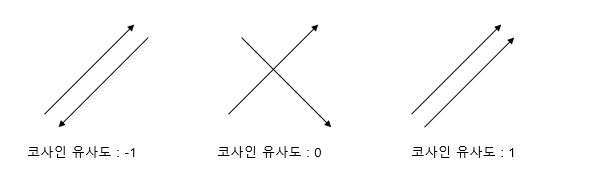
    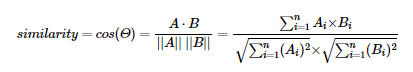
    - 문서 단어 행렬이나 TF-IDF 행렬을 통해서 문서의 유사도를 구하는 경우, 문서 단어 행렬이나 TF-IDF 행렬이 각각의 특징 벡터 A, B가 됩니다
        - 예시)
        - 문서1 : 저는 사과 좋아요
        - 문서2 : 저는 바나나 좋아요
        - 문서3 : 저는 바나나 좋아요 저는 바나나 좋아요
        - 띄어쓰기 기준 토큰화
        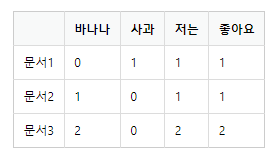

In [1]:
# numpy를 활용해, 코사인 유사도를 계산하는 함수 구현
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


- 문서1과 문서2의 코사인 유사도와 문서1과 문서3의 코사인 유사도가 같음
- 문서2와 문서3의 코사인 유사도가 1이 나옴
    - 벡터의 방향이 완전히 동일한 경우 1, 유사도의 값이 최대
    - 모든 단어의 빈도수가 동일하게 증가하는 경우에는 기존의 문서와 코사인 유사도의 값이 1이다
- 코사인 유사도, 유클리드 거리
    - 문서A와 문서B는 동일한 주제, 문서C는 다른주제
    - 문서A와 문서C는 비슷한 길이, 문서B의 경우 A와 C에 비해 2배정도의 길이
    - 유클리드 거리로 유사도를 계산하는 경우, A와 C의 유사도 > A와 B의 유사도
    - 코사인 유사도: A와 B의 유사도 > A와 C의 유사도
- 유사도를 구할 때 벡터의 방향(패턴)에 초점을 두므로, 코사인 유사도는 문서의 길이가 다른 상황에서 비교적 공정한 비교 가능

### 유사도를 이용한 추천 시스템 구현하기
- 캐글에서 사용되었던 영화 데이터셋을 가지고 영화 추천 시스템을 만들기
- TF-IDF와 코사인 유사도
- 다운로드 링크 : https://www.kaggle.com/rounakbanik/the-movies-dataset
- 24개 컬럼, 45,466개의 샘플로 구성된 영화 정보 데이터

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


- 영화 제목에 해당하는 title 열과 줄거리에 해당하는 overview 열 활용 예정
- 좋아하는 영화를 입력하면, 해당 영화의 줄거리와 유사한 줄거리의 영화를 찾아서 추천하는 시스템을 만들 예정

In [3]:
# 상위 2만개의 샘플을 data에 저장
data = data.head(20000)

- TF-IDF를 연산할 때 데이터에 NULL값이 있으면 에러가 발생함

In [4]:
# overview 열에 존재하는 모든 결측값을 전부 카운트하여 출력
print('overview 열의 결측값의 수:',data['overview'].isnull().sum())

overview 열의 결측값의 수: 135


In [5]:
# 결측값을 빈 값으로 대체
data['overview'] = data['overview'].fillna('')

In [6]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)

TF-IDF 행렬의 크기(shape) : (20000, 47487)


- 20,000개의 영화를 표현하기 위해서 총 47,487개의 단어가 사용되었음

In [7]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('코사인 유사도 연산 결과 :',cosine_sim.shape)

코사인 유사도 연산 결과 : (20000, 20000)


In [12]:
cosine_sim

array([[1.        , 0.01575748, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01575748, 1.        , 0.04907345, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04907345, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.08375766],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.08375766, 0.        ,
        1.        ]])

- 모든 20,000개 영화의 상호 유사도가 기록되어져 있음
- 영화의 타이틀을 key, 영화의 인덱스를 value로 하는 딕셔너리 title_to_index를 만들 예정

In [8]:
title_to_index = dict(zip(data['title'], data.index))

# 영화 제목 Father of the Bride Part II의 인덱스를 리턴
idx = title_to_index['Father of the Bride Part II']
print(idx)

4


In [11]:
title_to_index

{'Toy Story': 0,
 'Jumanji': 1,
 'Grumpier Old Men': 2,
 'Waiting to Exhale': 3,
 'Father of the Bride Part II': 4,
 'Heat': 14684,
 'Sabrina': 888,
 'Tom and Huck': 7,
 'Sudden Death': 8,
 'GoldenEye': 9,
 'The American President': 10,
 'Dracula: Dead and Loving It': 11,
 'Balto': 12,
 'Nixon': 13,
 'Cutthroat Island': 14,
 'Casino': 15,
 'Sense and Sensibility': 16,
 'Four Rooms': 17,
 'Ace Ventura: When Nature Calls': 18,
 'Money Train': 19,
 'Get Shorty': 20,
 'Copycat': 21,
 'Assassins': 22,
 'Powder': 23,
 'Leaving Las Vegas': 24,
 'Othello': 15347,
 'Now and Then': 26,
 'Persuasion': 14838,
 'The City of Lost Children': 28,
 'Shanghai Triad': 29,
 'Dangerous Minds': 30,
 'Twelve Monkeys': 31,
 'Wings of Courage': 32,
 'Babe': 33,
 'Carrington': 34,
 'Dead Man Walking': 35,
 'Across the Sea of Time': 36,
 'It Takes Two': 37,
 'Clueless': 38,
 'Cry, the Beloved Country': 39,
 'Richard III': 17719,
 'Dead Presidents': 41,
 'Restoration': 42,
 'Mortal Kombat': 43,
 'To Die For': 44,

In [27]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당 영화의 인덱스를 받아온다.
    idx = title_to_index[title]

    # 해당 영화와 모든 영화와의 유사도를 가져온다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아온다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 얻는다.
    movie_indices = [idx[0] for idx in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴한다.
    return data['title'].iloc[movie_indices]

In [14]:
idx = title_to_index['Father of the Bride Part II']
idx

4

In [21]:
sim_scores=list(enumerate(cosine_sim[idx]))
sim_scores

[(0, 0.0),
 (1, 0.0),
 (2, 0.025004916790732457),
 (3, 0.0),
 (4, 1.0),
 (5, 0.0),
 (6, 0.03297982155878723),
 (7, 0.0),
 (8, 0.032751274283663236),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.016175380793782074),
 (17, 0.0),
 (18, 0.02255625863484679),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.010453269553250329),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.012483050325811316),
 (34, 0.0),
 (35, 0.0),
 (36, 0.008551449198000282),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.012535288895276213),
 (42, 0.005066317867374504),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0261801467851982),
 (48, 0.0),
 (49, 0.0),
 (50, 0.030452575775893928),
 (51, 0.008835118316997884),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.017932910857610264),
 (57, 0.0),
 (58, 0.018584923398927675),
 (59, 0.0),
 (60, 0.01619551940057139),
 (61, 0.013

In [22]:
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores

[(4, 1.0),
 (6793, 0.3066645162650513),
 (6571, 0.2831640675142875),
 (6306, 0.28098375143123006),
 (19801, 0.2742858999532513),
 (5005, 0.2500255863674609),
 (13611, 0.24972568693001884),
 (7097, 0.23264970441562288),
 (926, 0.22125958103902596),
 (13420, 0.21070467647993246),
 (5571, 0.20133216314749067),
 (13928, 0.19495304005974154),
 (6813, 0.18545625216643363),
 (10260, 0.18464872567140178),
 (5749, 0.18149268824506884),
 (1516, 0.1814328492891251),
 (4112, 0.17797827120546403),
 (10381, 0.17759557909499227),
 (13383, 0.17270231161174054),
 (9174, 0.17017504843202785),
 (15155, 0.1698236019983004),
 (18310, 0.168777143249199),
 (14489, 0.1616845958249809),
 (19090, 0.15989420886266692),
 (14931, 0.15880012153144313),
 (11248, 0.15693012287862962),
 (555, 0.15627630709814797),
 (2823, 0.15573538394611489),
 (5819, 0.15435733119100803),
 (15837, 0.1526092592572152),
 (7540, 0.14572469187888493),
 (6715, 0.14499991830853598),
 (14939, 0.14151086165260637),
 (16064, 0.139874507229204

In [23]:
sim_scores = sim_scores[1:11]
sim_scores

[(6793, 0.3066645162650513),
 (6571, 0.2831640675142875),
 (6306, 0.28098375143123006),
 (19801, 0.2742858999532513),
 (5005, 0.2500255863674609),
 (13611, 0.24972568693001884),
 (7097, 0.23264970441562288),
 (926, 0.22125958103902596),
 (13420, 0.21070467647993246),
 (5571, 0.20133216314749067)]

In [24]:
movie_indices = [idx[0] for idx in sim_scores]
movie_indices

[6793, 6571, 6306, 19801, 5005, 13611, 7097, 926, 13420, 5571]

In [25]:
data['title'].iloc[movie_indices]

6793       Father of the Bride
6571                     Kuffs
6306           North to Alaska
19801                  Babbitt
5005                   Wendigo
13611      The Magic of Méliès
7097        The Out of Towners
926      It's a Wonderful Life
13420             Funny People
5571            All Night Long
Name: title, dtype: object

In [28]:
get_recommendations('The Dark Knight Rises')

12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object